In [6]:
from app.allocation import *
import matplotlib.pyplot as plt
from app.alloc_metric import *
from pprint import pprint
from collections import defaultdict 
import time
import json
import math
import csv

In [60]:
studentPref = "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/prefs.csv"
ProjectInfo =  "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/proj.csv"

with open(studentPref, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    studentPreferences = createStudentPrefMap(inputDict)
with open(ProjectInfo, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    StaffProjMap = createProjStaffMap(inputDict)
config = Config(defaultLoad = 10, maxDepth = 3)
studentProjectList = {
    student: [proj for proj, _ in projList]
    for student, projList in studentPreferences.items()
}
costMap = getCostMap(studentPreferences)


In [8]:
#manipulating the number of preferences
def filterProjectChoice(studentPreferences, givenRank):
    out = studentPreferences.copy()
    for k, v in out.items():
        out[k] = v[:givenRank]
    return out


In [150]:
def showPopularity(pref):
    projectStudentMap = defaultdict(int)
    for _, l in pref.items():
        for p, l in l:
            projectStudentMap[p] += 1
    if projectStudentMap[0]: projectStudentMap.pop(0)
    return projectStudentMap


def staffPopularity(pref, projStaff):
    projectMap = showPopularity(studentPreferences)
    out = defaultdict(int)
    for k, v in projectMap.items():
        out[projStaff[k]] += v
    return out

def convertToUnequalRank(studentPreferences):
    studentProjectList = {
        student: [(proj,i+1) for i,(proj, _) in enumerate(projList)]
        for student, projList in studentPreferences.items()
    }
    return studentProjectList

# staffPopularity(studentPreferences, StaffProjMap)

In [10]:
def showLoad(alloc, StaffProjMap, ax=None, name=None, title='Loading For Each Supervisor'):
    ax = ax or plt.gca()
    loadMap = getLoadMap(StaffProjMap, alloc)
    ax.bar([str(a) for a in loadMap.keys()], loadMap.values())
    ax.set_title(title)
    return ax

In [159]:
def showRank(alloc, studentPreferences, ax=None, name=None, title='Number of Students For Each Rank'):
    ax = ax or plt.gca()
    rankMap = getStudentRankMap(alloc, studentPreferences)
    # ax.hist(rankMap.values())
    # ax.set_title(title)
    return rankMap

In [66]:
def callback():
    while True:
        a = yield
        print(a)

In [195]:
Unfair01 = []
for i in range(5):    
    Unfair01 += [bestAllocate(studentPreferences, StaffProjMap, config=Config(numRuns=30, maxDepth=10,defaultLoad=5, maxRank=5, weightVarLoad=0,weightUnfair=0.01, weightStaff=0), callback=callback())]

6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53.333333333333336
56.666666666666664
60.0
63.33333333333333
66.66666666666666
70.0
73.33333333333333
76.66666666666667
80.0
83.33333333333334
86.66666666666667
90.0
93.33333333333333
96.66666666666667
100.0
6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53.333333333333336
56.666666666666664
60.0
63.33333333333333
66.66666666666666
70.0
73.33333333333333
76.66666666666667
80.0
83.33333333333334
86.66666666666667
90.0
93.33333333333333
96.66666666666667
100.0
6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53

In [193]:
s_unfair = []
for r in Unfair:
    s_unfair += [getStat(r, costMap, StaffProjMap)]
pprint(s_unfair)

[{'AveUnfair': 0.3233082706766917,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 43,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 28,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.1505455367742665},
 {'AveUnfair': 0.3383458646616541,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 45,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 29,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.1505455367742665},
 {'AveUnfair': 0.3233082706766917,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 43,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 28,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.1505455367742665},
 {'AveUnfair': 0.3233082706766917,
  'AvgRank': 1.5413533834586466,
  'AvgRankN

In [191]:
pprint(s)

[{'AveUnfair': 0.3458646616541353,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 46,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 32,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.135507942789304},
 {'AveUnfair': 0.3458646616541353,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 46,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 32,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.135507942789304},
 {'AveUnfair': 0.3609022556390977,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUnalloc': 1.5413533834586466,
  'MagUnfair': 48,
  'MaxLoad': 5,
  'MaxRank': 5,
  'MedianLoad': 3,
  'MedianRank': 1,
  'NoUnalloc': 0,
  'NoUnfair': 33,
  'VarLoad': 2.2058298631766804,
  'VarianceRank': 1.135507942789304},
 {'AveUnfair': 0.3609022556390977,
  'AvgRank': 1.5413533834586466,
  'AvgRankNoUn

In [123]:
x = showPopularity(studentPreferences)
y = [1801538, 1801650, 1801395, 1801690, 1801714, 1801755, 1801621]
for i in y:
    print(x[i])
# [(k, v) for k, v in sorted(x.items(), key=lambda item: item[1])]]

1
1
3
5
7
10
23


In [97]:
projects = [(1801538, 1),
 (1801650, 1),
 (1801395, 3),
 (1801690, 5),
 (1801714, 7),
 (1801755, 10),
 (1801621, 23)]
r_rank = {}
for p,v in projects:
    newStuPref, newStaffProj, _ = splitProject([p], studentPreferences, StaffProjMap)
    
    r_rank[(p,v)] = result2

# result = bestAllocate(studentPreferences, StaffProjMap, config=Config(numRuns=30, maxDepth=10,defaultLoad=5, maxRank = 5), callback=callback())
r_rank[(0,0)] = r[(0,0)]

adding 1801804
6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53.333333333333336
56.666666666666664
60.0
63.33333333333333
66.66666666666666
70.0
73.33333333333333
76.66666666666667
80.0
83.33333333333334
86.66666666666667
90.0
93.33333333333333
96.66666666666667
100.0
adding 1801804
6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53.333333333333336
56.666666666666664
60.0
63.33333333333333
66.66666666666666
70.0
73.33333333333333
76.66666666666667
80.0
83.33333333333334
86.66666666666667
90.0
93.33333333333333
96.66666666666667
100.0
adding 1801804
6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0


In [142]:

result3 = bestAllocate(unequal, StaffProjMap, config=Config(numRuns=30, maxDepth=10,defaultLoad=5, maxRank = 5), callback=callback())

6.666666666666667
10.0
13.333333333333334
16.666666666666664
20.0
23.333333333333332
26.666666666666668
30.0
33.33333333333333
36.666666666666664
40.0
43.333333333333336
46.666666666666664
50.0
53.333333333333336
56.666666666666664
60.0
63.33333333333333
66.66666666666666
70.0
73.33333333333333
76.66666666666667
80.0
83.33333333333334
86.66666666666667
90.0
93.33333333333333
96.66666666666667
100.0


In [185]:
print(result3)

{90398: 1801697, 90363: 1801730, 90805: 1801615, 90305: 1801694, 90306: 1801638, 90304: 1801604, 90338: 1801746, 90808: 1801776, 90432: 1801666, 90346: 1801647, 90316: 1801623, 90362: 1801664, 90352: 1801724, 90810: 1801472, 90359: 1801745, 90426: 1801791, 90405: 1801772, 90353: 1801657, 90423: 1801454, 90453: 1801639, 90342: 1801750, 90356: 1801749, 90422: 1801747, 90321: 1801714, 90364: 1801572, 90375: 1801687, 90443: 1801686, 90414: 1801787, 90578: 1801779, 90382: 1801538, 90379: 1801781, 90301: 1801618, 90341: 1801650, 90424: 1801780, 90347: 1801754, 90371: 1801672, 90324: 1801783, 90439: 1801792, 90357: 1801411, 90429: 1801417, 90369: 1801429, 90317: 1801640, 90350: 1801770, 90416: 1801794, 90384: 1801693, 90444: 1801607, 90343: 1801412, 90298: 1801531, 90336: 1801630, 53446: 1801428, 90354: 1801690, 90367: 1801677, 90390: 1801500, 90427: 1801704, 90391: 1801653, 90434: 1801678, 90437: 1801699, 90397: 1801527, 90377: 1801689, 90320: 1801703, 90802: 1801380, 90400: 1801768, 90328: 

<ipython-input-181-25d70141d667>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


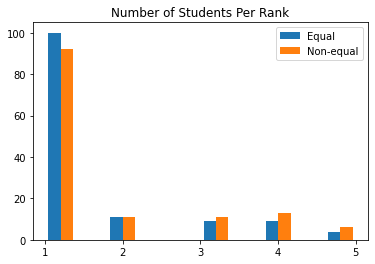

In [181]:
u = showRank(result3, studentPreferences)
e = showRank(r_rank[(0,0)], studentPreferences)
ax = plt.subplot()
ax.hist([list(e.values()), list(u.values())], label=['Equal', 'Non-equal'])
ax.set_xticks([1,2,3,4,5])
ax.legend()
ax.set_title('Number of Students Per Rank')
plt.savefig('equal_rank.pdf')

In [151]:
unequal = convertToUnequalRank(studentPreferences)
print(unequal)

{90382: [(1801780, 0), (1801538, 1), (1801499, 2), (1801657, 3), (1801754, 4), (1801531, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 90420: [(1801500, 0), (1801756, 1), (1801657, 2), (1801499, 3), (1801753, 4), (1801527, 5), (1801383, 6), (1801531, 7), (0, 8), (0, 9)], 90301: [(1801618, 0), (1801783, 1), (1801656, 2), (1801614, 3), (1801781, 4), (1801415, 5), (1801416, 6), (1801653, 7), (0, 8), (0, 9)], 90433: [(1801746, 0), (1801747, 1), (1801744, 2), (1801621, 3), (1801613, 4), (1801623, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 90321: [(1801713, 0), (1801714, 1), (1801674, 2), (1801622, 3), (1801613, 4), (1801698, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 90384: [(1801744, 0), (1801494, 1), (1801746, 2), (1801747, 3), (1801693, 4), (1801751, 5), (1801664, 6), (0, 7), (0, 8), (0, 9)], 90357: [(1801416, 0), (1801411, 1), (1801417, 2), (1801521, 3), (1801614, 4), (1801618, 5), (0, 6), (0, 7), (0, 8), (0, 9)], 90320: [(1801654, 0), (1801478, 1), (1801477, 2), (1801704, 3), (1801703, 4), (1801639, 5), (1

In [147]:
getStat(result3, getCostMap(studentPreferences), StaffProjMap)

{'MaxRank': 5,
 'MedianRank': 1,
 'AvgRank': 1.7218045112781954,
 'AvgRankNoUnalloc': 1.7218045112781954,
 'VarianceRank': 1.4940358414834078,
 'MaxLoad': 5,
 'MedianLoad': 3.0,
 'VarLoad': 2.2953514739229024,
 'NoUnfair': 44,
 'MagUnfair': 79,
 'AveUnfair': 0.5939849624060151,
 'NoUnalloc': 0}

In [148]:
getStat(r_rank[(0,0)], getCostMap(studentPreferences), StaffProjMap)

{'MaxRank': 5,
 'MedianRank': 1,
 'AvgRank': 1.5413533834586466,
 'AvgRankNoUnalloc': 1.5413533834586466,
 'VarianceRank': 1.1505455367742665,
 'MaxLoad': 5,
 'MedianLoad': 3,
 'VarLoad': 2.2058298631766804,
 'NoUnfair': 29,
 'MagUnfair': 45,
 'AveUnfair': 0.3383458646616541,
 'NoUnalloc': 0}

In [121]:
stat_pop = {}
for (k,p),v in r_rank.items():
    a, b, _ = splitProject([k], studentPreferences, StaffProjMap)
    print(p)
    # print(v)
    stat_pop[p] = getStat(v, getCostMap(a), b)

adding 1801804
1
adding 1801804
1
adding 1801804
3
adding 1801804
5
adding 1801804
7
adding 1801804
10
adding 1801804
23
adding 1801804
0


In [90]:
print(stat_)

{1: {'MaxRank': 5, 'MedianRank': 1, 'AvgRank': 1.5413533834586466, 'AvgRankNoUnalloc': 1.5413533834586466, 'VarianceRank': 1.1505455367742665, 'MaxLoad': 5, 'MedianLoad': 3, 'VarLoad': 2.2058298631766804, 'NoUnfair': 28, 'MagUnfair': 43, 'AveUnfair': 0.3233082706766917, 'NoUnalloc': 0}, 15: {'MaxRank': 5, 'MedianRank': 1, 'AvgRank': 1.4962406015037595, 'AvgRankNoUnalloc': 1.4962406015037595, 'VarianceRank': 1.0920911300808411, 'MaxLoad': 5, 'MedianLoad': 3, 'VarLoad': 2.2058298631766804, 'NoUnfair': 28, 'MagUnfair': 43, 'AveUnfair': 0.3233082706766917, 'NoUnalloc': 0}, 0: {'MaxRank': 5, 'MedianRank': 1, 'AvgRank': 1.5413533834586466, 'AvgRankNoUnalloc': 1.5413533834586466, 'VarianceRank': 1.1505455367742665, 'MaxLoad': 5, 'MedianLoad': 3, 'VarLoad': 2.2058298631766804, 'NoUnfair': 29, 'MagUnfair': 45, 'AveUnfair': 0.3383458646616541, 'NoUnalloc': 0}, 2: {'MaxRank': 5, 'MedianRank': 1, 'AvgRank': 1.556390977443609, 'AvgRankNoUnalloc': 1.556390977443609, 'VarianceRank': 1.194188478715585

In [91]:
def getMetricList(stats, bot=None, top=None):
    new_stats = defaultdict(dict)
    for load, stat in stats.items():
        if top and int(load) > top: continue
        if bot and int(load) < bot: continue
        for metric, val in stat.items():
            new_stats[metric][load] = val

    for metric, val in new_stats.items():
        sort_dict= dict(sorted(val.items(), key=lambda item: int(item[0])))
        new_stats[metric] = {int(a):float(b) for a,b in sort_dict.items()}
    return new_stats
getMetricList(stat)

defaultdict(dict,
            {'MaxRank': {0: 5.0,
              1: 5.0,
              2: 5.0,
              3: 5.0,
              5: 5.0,
              7: 5.0,
              9: 5.0,
              10: 5.0,
              15: 5.0},
             'MedianRank': {0: 1.0,
              1: 1.0,
              2: 1.0,
              3: 1.0,
              5: 1.0,
              7: 1.0,
              9: 1.0,
              10: 1.0,
              15: 1.0},
             'AvgRank': {0: 1.5413533834586466,
              1: 1.5413533834586466,
              2: 1.556390977443609,
              3: 1.5037593984962405,
              5: 1.5338345864661653,
              7: 1.5112781954887218,
              9: 1.5413533834586466,
              10: 1.518796992481203,
              15: 1.4962406015037595},
             'AvgRankNoUnalloc': {0: 1.5413533834586466,
              1: 1.5413533834586466,
              2: 1.556390977443609,
              3: 1.5037593984962405,
              5: 1.5338345864661653,
      

In [29]:
costMap = getCostMap(studentPreferences)
print(getStat(result, costMap, StaffProjMap))
newcostMap = getCostMap(newStuPref)
print(getStat(result2, newcostMap, newStaffProj))

NameError: name 'result' is not defined

In [13]:
def data_collection(config):
    stats = {}
    allocs= {}
    results = {}
    maxVal = 300

    studentProjectList = {
    student: [proj for proj, _ in projList]
        for student, projList in studentPreferences.items()
    }
    cost = None
    result = None
    costMap = getCostMap(studentPreferences)
    start = time.time()
    for i in range(1, maxVal, 10):
        config.numRuns = i
        result = bestAllocate(studentPreferences, StaffProjMap, config=config)
        stats[i] =  getStat(result, costMap, StaffProjMap)
        metric = 'AvgRank'
        print(f'Iteration {i} | Been running for {(time.time() - start):.2f}s | {metric}: {stats[i][metric]:.4f}')
        stats[i]['Duration'] = time.time() - start
        start = time.time()
        results[i] = result
    duration = time.time() - start
    return stats, results
stats, results = data_collection(Config(defaultLoad=20, maxDepth=4, weightVarLoad=0))


Iteration 1 | Been running for 0.57s | AvgRank: 1.4662
Iteration 11 | Been running for 5.22s | AvgRank: 1.4211
Iteration 21 | Been running for 10.00s | AvgRank: 1.4361
Iteration 31 | Been running for 14.56s | AvgRank: 1.4135
Iteration 41 | Been running for 18.78s | AvgRank: 1.4135
Iteration 51 | Been running for 25.06s | AvgRank: 1.4060
Iteration 61 | Been running for 27.88s | AvgRank: 1.4211
Iteration 71 | Been running for 33.82s | AvgRank: 1.4211
Iteration 81 | Been running for 37.64s | AvgRank: 1.4060
Iteration 91 | Been running for 42.32s | AvgRank: 1.4135
Iteration 101 | Been running for 48.11s | AvgRank: 1.4135
Iteration 111 | Been running for 53.42s | AvgRank: 1.4211
Iteration 121 | Been running for 56.27s | AvgRank: 1.4211
Iteration 131 | Been running for 61.81s | AvgRank: 1.4211
Iteration 141 | Been running for 69.04s | AvgRank: 1.4211
Iteration 151 | Been running for 73.24s | AvgRank: 1.4060
Iteration 161 | Been running for 87.25s | AvgRank: 1.4135
Iteration 171 | Been runnin

In [7]:
def obj_f(r, costMap, projStaffMap, config):
   return sumCost(r, costMap) \
            + config.weightUnfair * costUnfair(r, costMap)\
            + len(r)\
            * config.weightVarLoad\
            / 10\
            * pvariance(list(getLoadMap(projStaffMap, r).values()))

In [8]:
b = stats_maxRank.copy()
for i, r in (results_maxRank.items()):
    b[i]['objective'] = obj_f(r, costMap, StaffProjMap, Config(defaultLoad=20, maxDepth=4, numRuns=i, weightUnfair=0.01, weightVarLoad=1))

NameError: name 'stats_maxRank' is not defined

In [17]:
def getMetricList(stats_maxRank):
    new_stats = defaultdict(dict)
    for load, stat in stats_maxRank.items():
        for metric, val in stat.items():
            new_stats[metric][load] = val

    for metric, val in new_stats.items():
        sort_dict= dict(sorted(val.items(), key=lambda item: int(item[0])))
        new_stats[metric] = {int(a):float(b) for a,b in sort_dict.items()}
    return new_stats
new_stats = getMetricList(stats)

In [11]:
fig,axes = plt.subplots(4, figsize=(10,6))
axes[0].plot(new_stats['AvgRank'].keys(), new_stats['AvgRank'].values())
axes[1].plot(new_stats['AveUnfair'].keys(), new_stats['AveUnfair'].values())
axes[2].plot(new_stats['VarLoad'].keys(), new_stats['VarLoad'].values())
axes[3].plot(new_stats['objective'].keys(), new_stats['objective'].values())
plt.suptitle('Metrics vs. Num Runs at Depth = 4 with Weight Unfair = 0.1 and Weight Variance=1')
plt.xlabel('Number of Runs')
axes[0].set_ylabel('Average Rank')
axes[1].set_ylabel('Magnitude Unfairness')
axes[2].set_ylabel('Variance Loading')
axes[3].set_ylabel('Objective Function')
fig.tight_layout()
# print(new_stats['AvgRank'])
plt.savefig('./evaluations/figures/depth4-NoCon-minunfairandvariance.svg')

NameError: name 'new_stats' is not defined

In [171]:
def plotAllMetric(new_stats):
    fig, axes = plt.subplots(len(new_stats), 1, figsize=(10, 20), sharey='row')
    for i, ((metric, l)) in enumerate(new_stats.items()):
        axes[i].plot(list(l.keys()), list(l.values()), label='Depth')
        axes[i].set_ylabel(metric)
    axes[0].set_title('Metrics Against Number of Run with Depth = 5 and Loading Constraint = 4')
    fig.tight_layout()
# plotAllMetric(new_stats)

In [7]:
f = open('./evaluations/results/stats_depth5_load20')
r = json.load(f)
# print(stat)
stat= getMetricList(r)
plotAllMetric(stat)

NameError: name 'getMetricList' is not defined

<AxesSubplot:title={'center':'Number of Students For Each Rank'}>

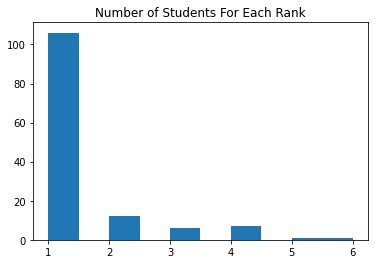

In [15]:
showRank(result, studentPreferences)

In [13]:
print([(x ,v)  for x, y in stats.items() for m, v in y.items() if m == 'AvgRank'])

NameError: name 'stats' is not defined

In [11]:
for x, y in allocs[11].items():
    if allocs[9][x] != y:
        print(x, y, allocs[9][x])

90455 1801615 1801494
90391 1801416 1801653
90384 1801494 1801744
90433 1801744 1801613
90405 1801634 1801633
90345 1801633 1801634
90802 1801613 1801615
90440 1801653 1801416
89999 1801454 1801641


In [15]:
a_file = open("./evaluations/results/results_costunfair_load20_depth4", "w")
json.dump(results, a_file)
a_file.close()

Text(0, 0.5, 'Average Rank')

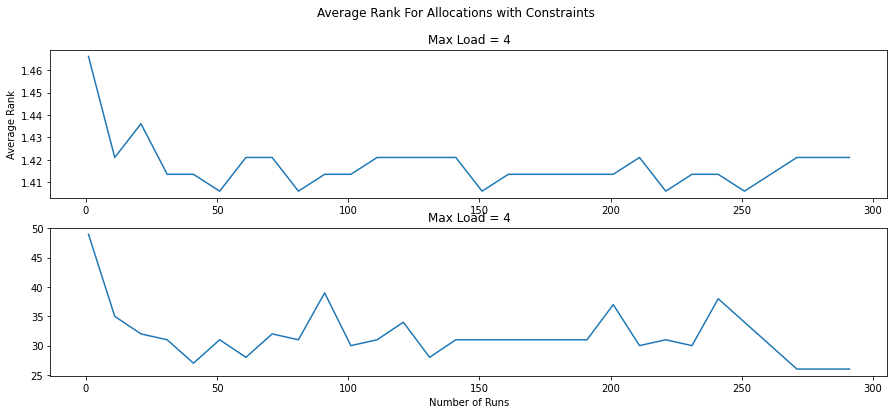

In [19]:



# a_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stats_depth5_rank5", "r")
# stat_rank = json.load(a_file)
# cleanStatRank = getMetricList(stat_rank)
# b_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stat_depth5_load4", "r")
# stat = json.load(b_file)
cleanStat = getMetricList(stats)
fig,axes = plt.subplots(2, figsize=(15,6))
plt.suptitle('Average Rank For Allocations with Constraints')
axes[0].plot(cleanStat['AvgRank'].keys(), cleanStat['AvgRank'].values())
axes[0].title.set_text('Max Load = 4')
axes[1].plot(cleanStat['MagUnfair'].keys(), cleanStat['MagUnfair'].values())
axes[1].title.set_text('Max Load = 4')
plt.xlabel('Number of Runs')
axes[0].set_ylabel('Average Rank')
# axes[1].set_ylabel('Average Rank')
# plt.savefig('avgRank_constriants.pdf')

In [37]:
print(new_stats['AvgRank'])

{100: 1.5338345864661653, 200: 1.5263157894736843, 300: 1.5263157894736843, 400: 1.5263157894736843, 500: 1.5263157894736843, 600: 1.5263157894736843, 700: 1.5263157894736843, 800: 1.5263157894736843, 900: 1.5263157894736843}


In [8]:
result = bestAllocate(studentPreferences, StaffProjMap, config=Config(costUnalloc=-1, defaultLoad=3, maxRank=5, maxDepth=12, numRuns=20))
print('done')
result_2 = bestAllocate(studentPreferences, StaffProjMap, config=Config(defaultLoad=3, maxRank=5, costUnalloc=100, maxDepth=12, numRuns=20))

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
6
6
6
6
6
6
7
8
6
6
6
6
8
6
6
6
6
6
6
6
6
6
6
8
6
6
6
7
6
6
6
6
7
6
6
6
6
6
6
6
6
6
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
6
6
6
6
6
6
6
7
8
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
8
6
7
6
6
6
6
6
6
6
8
6
6
6
6
6
6
6
6
6
6
6
8
6
6
6
6
6
6
6
6
6
6
6
6
6
done
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
10

In [9]:
stat1 = getStat(result, costMap, StaffProjMap)
stat2 = getStat(result_2, costMap, StaffProjMap)
print(stat1)
print(stat2)

{'MaxRank': 5, 'MedianRank': 1.0, 'AvgRank': 31.58823529411765, 'AvgRankNoUnalloc': 1.196078431372549, 'VarianceRank': 0.4909650134563629, 'MaxLoad': 3, 'MedianLoad': 3.0, 'VarLoad': 0.6167800453514739, 'NoUnfair': 3, 'MagUnfair': 4, 'AveUnfair': 0.03007518796992481, 'NoUnalloc': 31}
{'MaxRank': 5, 'MedianRank': 1, 'AvgRank': 30.398058252427184, 'AvgRankNoUnalloc': 1.2718446601941749, 'VarianceRank': 0.7610519370345934, 'MaxLoad': 3, 'MedianLoad': 3.0, 'VarLoad': 0.6218820861678005, 'NoUnfair': 4, 'MagUnfair': 8, 'AveUnfair': 0.06015037593984962, 'NoUnalloc': 30}


In [11]:
set1 = {s for s,v in result.items() if v == 0}
set2 = {s for s,v in result_2.items() if v == 0}
print(set1 - set2)

{90359, 90308, 90378, 90381, 90350, 90419, 90388, 90421, 90422, 90327, 90362, 90331, 90334, 90398, 90431}


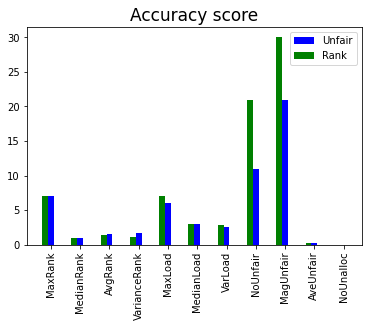

In [32]:
UnfairRank9

In [ ]:
X = np.arange(len(stat1))
ax = plt.subplot(111)
ax.bar(X, stat1.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, stat2.values(), width=0.2, color='g', align='center')
ax.legend(('with weight','without weight'))
plt.xticks(X, stat1.keys(),rotation=50)
plt.title("Accuracy score", fontsize=17)
plt.show()

In [156]:
import math
import numpy as np
def createMockData(noStudent, tightness, load, num_choices, ratioProjectStaff, ratioStudentGeneral, equalCloseness):
    noStaff = math.ceil((noStudent * tightness)/load)
    projectPop = [np.random.normal(scale=1.0) for i in range(load*noStaff)]
    staffPop =   [np.random.normal(scale=ratioProjectStaff) for i in range(noStaff)]
    studentPreferences = defaultdict(list)
    for i in range(noStudent):
        projectFit = [ratioStudentGeneral*np.random.normal(scale=1.0) for i in range(len(projectPop))]
        staffFit = [ratioStudentGeneral*np.random.normal(scale=ratioProjectStaff) for i in range(len(staffPop))]
        totalStaffPref = np.add(staffPop, staffFit)
        totalProjPref = np.add(projectPop, projectFit)
        finalPref = np.add(totalProjPref,np.repeat(totalStaffPref, load))
        finalPref = np.array([x/sum(finalPref) for x in finalPref])
        selectedProject = np.argsort(-finalPref)[:num_choices]
        studentPreferences[i] += [(selectedProject[0], 1)]
        rank = 1
        for j, (proj, prev_proj) in enumerate(zip(selectedProject[1:], selectedProject)):
            rank = rank if finalPref[prev_proj] - finalPref[proj] < equalCloseness else j+2
            studentPreferences[i] += [(proj, rank)]
    return studentPreferences
print(createMockData(100, 1.2, 5, 10, 1, 1, 0.002))



defaultdict(<class 'list'>, {0: [(48, 1), (71, 2), (2, 3), (34, 4), (47, 5), (29, 6), (90, 7), (59, 8), (24, 9), (73, 10)], 1: [(21, 1), (108, 2), (48, 3), (73, 4), (47, 5), (55, 6), (105, 7), (67, 8), (59, 8), (117, 8)], 2: [(0, 1), (2, 2), (24, 3), (58, 3), (13, 3), (21, 6), (12, 7), (11, 7), (48, 7), (59, 10)], 3: [(49, 1), (48, 1), (114, 3), (90, 4), (92, 5), (32, 5), (7, 5), (9, 8), (45, 8), (47, 10)], 4: [(48, 1), (45, 2), (66, 3), (62, 4), (69, 4), (65, 6), (102, 7), (68, 7), (46, 9), (67, 10)], 5: [(115, 1), (17, 2), (80, 3), (82, 4), (87, 5), (74, 6), (85, 7), (72, 8), (14, 9), (30, 10)], 6: [(117, 1), (2, 2), (59, 3), (118, 3), (29, 5), (21, 6), (60, 7), (105, 7), (0, 9), (41, 10)], 7: [(48, 1), (73, 2), (68, 3), (107, 4), (61, 5), (47, 6), (64, 6), (67, 8), (60, 9), (94, 10)], 8: [(48, 1), (29, 2), (4, 3), (2, 4), (0, 5), (68, 6), (9, 7), (35, 8), (45, 9), (92, 9)], 9: [(48, 1), (47, 2), (68, 3), (69, 4), (66, 5), (67, 6), (108, 7), (16, 7), (46, 7), (45, 7)], 10: [(40, 1), 